## **COGNORISE INFOTECH PROJECT**

**VISHNU R NAIR**

# **SPAM EMAIL DETECTION**

AIM:To classify emails as spam or not spam based on their content.

 **Importing Necessary Modules And Packages**

In [55]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve,auc,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

**Importing DataSet**

In [18]:
df=pd.read_csv('spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
#rename the columns name
df.rename(columns={'Category':'target','Message':'text'},inplace=True)

In [20]:
#Checking For Missing Values
df.isna().sum()

target    0
text      0
dtype: int64

In [21]:
#Checking For Duplicates
df.duplicated().sum()

np.int64(415)

In [22]:
#Dropping Duplicates
df=df.drop_duplicates()

In [23]:
#shape of dataset
df.shape

(5157, 2)

**Exploratory Data Analysis**

In [24]:
# Percentage of Ham and Spam
values=df['target'].value_counts()

total=values.sum()

ham=(values[0]/total)*100
spam=(values[1]/total)*100\

labels=[ham,spam]

print('percentage of ham :' ,ham)
print('percentage of spam:',spam)

percentage of ham : 87.5702928058949
percentage of spam: 12.429707194105099


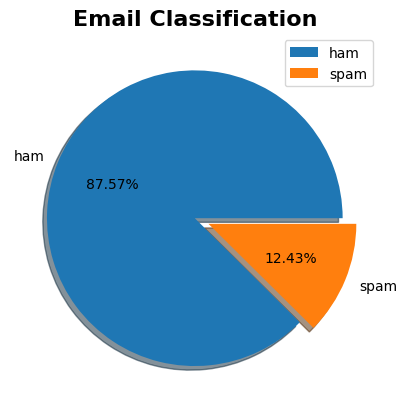

In [25]:
plt.title('Email Classification', fontsize=16, fontweight='bold')
plt.pie(df['target'].value_counts(),autopct='%0.2f%%',labels=df['target'].unique(),shadow=True,explode=[0,0.1])
plt.legend()
plt.show()

**Text Length and Structural Analysis**

In [26]:
nltk.download('punkt')

#To get Number of characters in each instance
df['Number of characters']=df['text'].apply(len)

#To get Number of words in each instance
df['Number of words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

#To get Number of sentences in each instance
df['Number of sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VISHNU_STUDY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
df.head()

,target,text,Number of characters,Number of words,Number of sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


**Summary Statistics**

In [28]:
df[['Number of characters','Number of words','Number of sentences']].describe()

,Number of characters,Number of words,Number of sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


**Summary Statistics for Ham Message**

In [29]:
df.loc[df['target']=='ham'][['Number of characters','Number of words','Number of sentences']].describe()

,Number of characters,Number of words,Number of sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


**Summary Statistics for Spam Message**

In [30]:
df.loc[df['target']=='spam'][['Number of characters','Number of words','Number of sentences']].describe()

,Number of characters,Number of words,Number of sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


**Label Encoding**

In [31]:
df['target']=df['target'].replace({'ham':0,'spam':1})

In [32]:
df.head()

,target,text,Number of characters,Number of words,Number of sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


**Correlation**

In [33]:
df[['target','Number of characters','Number of words','Number of sentences']].corr()

,target,Number of characters,Number of words,Number of sentences
target,1.000000,0.374409,0.255968,0.259023
Number of characters,0.374409,1.000000,0.966155,0.622428
Number of words,0.255968,0.966155,1.000000,0.679396
Number of sentences,0.259023,0.622428,0.679396,1.000000


<Axes: >

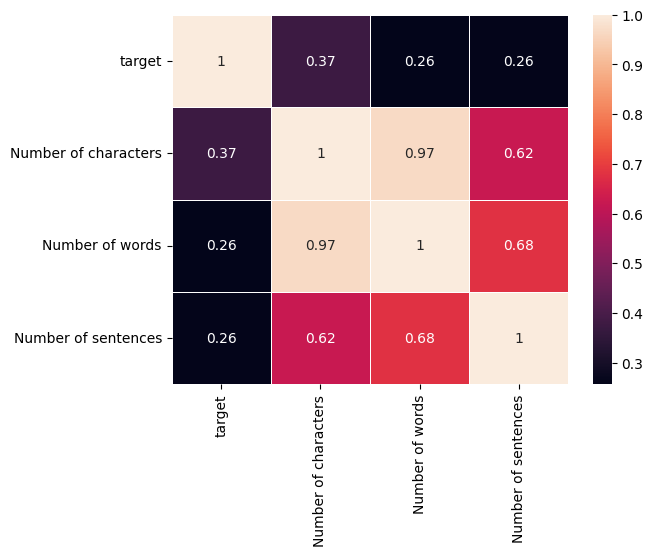

In [34]:
sns.heatmap(df[['target','Number of characters','Number of words','Number of sentences']].corr(),annot=True,linewidth=.5)

# **Data Preprocessing**

**Removing Special Characters**

In [35]:
df['text']=df['text'].str.replace('[^a-zA-Z0-9 ]',"",regex=True)

**Removing Stopwords**

In [36]:
nltk.download('stopwords')
sw=stopwords.words('english')
df['text']=df['text'].apply(lambda x:[i for i in nltk.word_tokenize(x) if i not in sw]).apply(lambda x:" ".join(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VISHNU_STUDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Stemming**

In [37]:
ss=SnowballStemmer('english')
df['text']=df['text'].apply(lambda x:[ss.stem(i.lower()) for i in nltk.word_tokenize(x)]).apply(lambda x:' '.join(x))

In [38]:
df['text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkts 2...
3                     u dun say earli hor u c alreadi say
4             nah i dont think goe usf live around though
                              ...                        
5567    this 2nd time tri 2 contact u u 750 pound priz...
5568                           will b go esplanad fr home
5569                              piti mood soani suggest
5570    the guy bitch i act like id interest buy somet...
5571                                    rofl it true name
Name: text, Length: 5157, dtype: object

**Vectorization**

In [42]:
vectorizer=TfidfVectorizer()
data=vectorizer.fit_transform(df['text'])
data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 46831 stored elements and shape (5157, 8157)>

In [43]:
type(data)

scipy.sparse._csr.csr_matrix

**Features and Labels**

In [44]:
#Converting sparse matrix to array
X=data.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
X.shape

(5157, 8157)

In [46]:
y=df['target']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5157, dtype: int64

**Train Test Split**

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

**Creating Object and Calculating performance metrics**

-------------------- KNeighborsClassifier --------------------
Accuracy Score :  0.9108527131782945
Precision Score:  1.0
Recall Score   :  0.32019704433497537


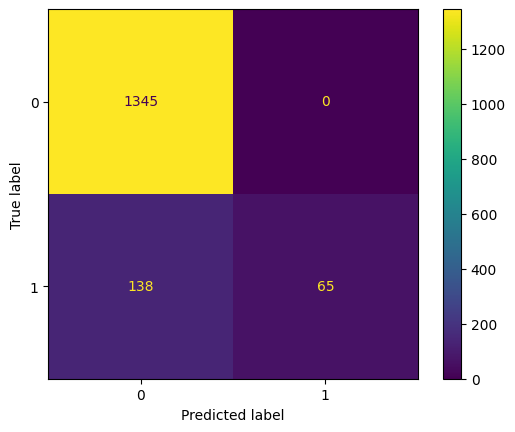

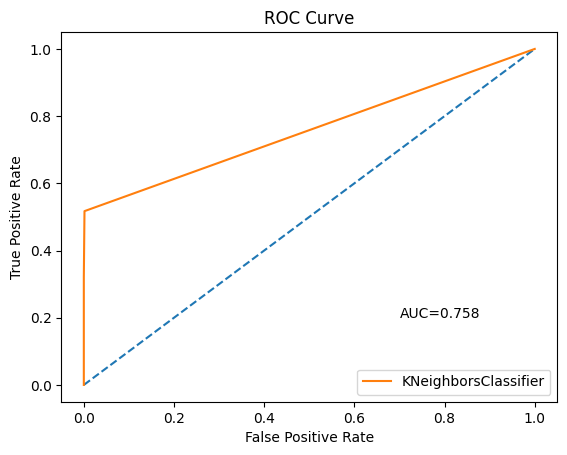



-------------------- RandomForestClassifier --------------------
Accuracy Score :  0.9677002583979328
Precision Score:  0.9811320754716981
Recall Score   :  0.7684729064039408


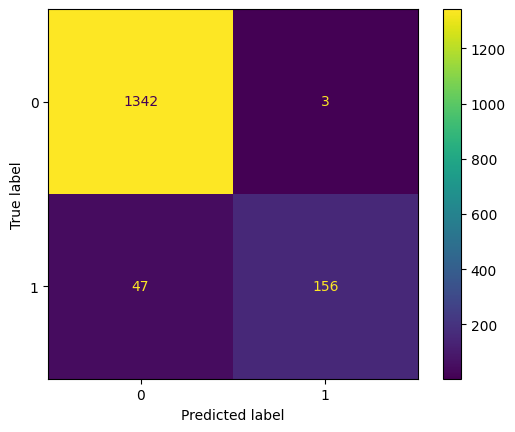

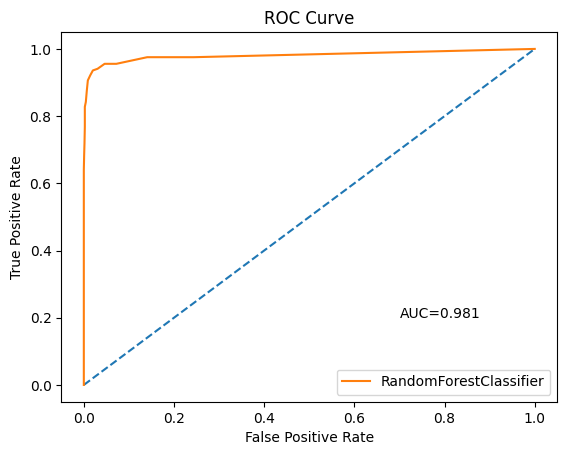



-------------------- AdaBoostClassifier --------------------
Accuracy Score :  0.9580103359173127
Precision Score:  0.8709677419354839
Recall Score   :  0.7980295566502463


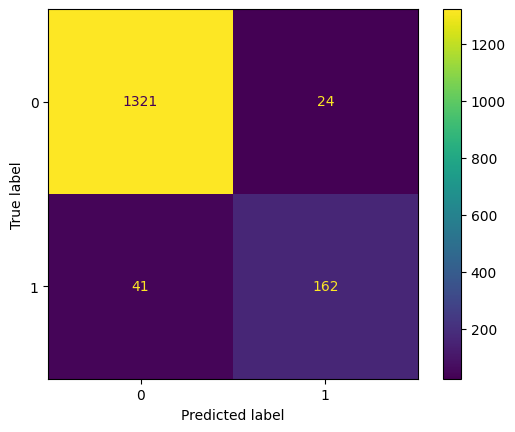

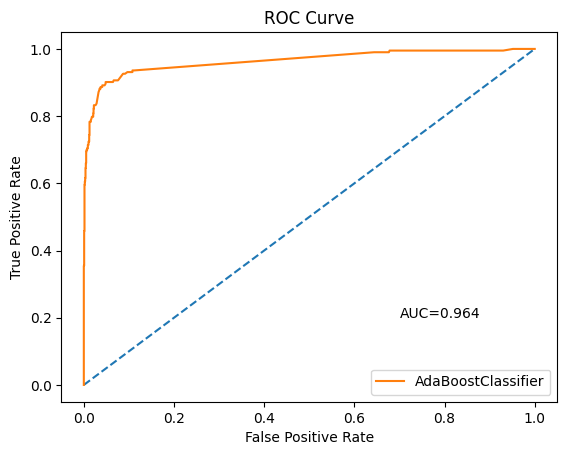



-------------------- LogisticRegression --------------------
Accuracy Score :  0.9437984496124031
Precision Score:  0.9754098360655737
Recall Score   :  0.5862068965517241


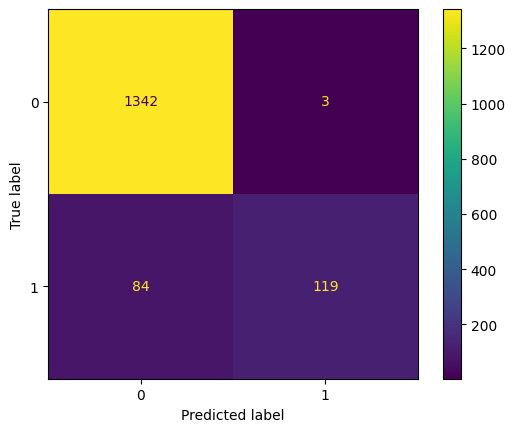

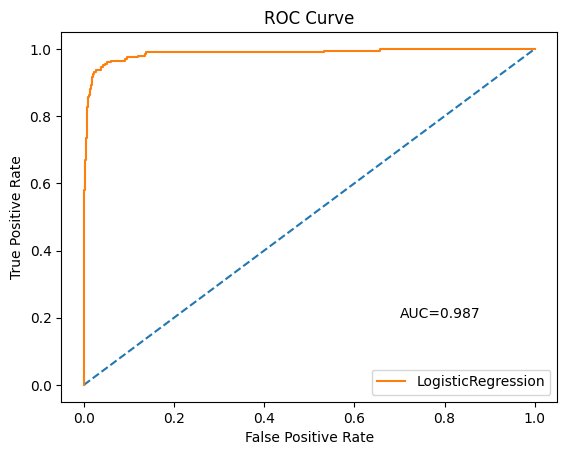

In [53]:
knn=KNeighborsClassifier(n_neighbors=3)
rf=RandomForestClassifier(random_state=18,n_estimators=25)
ad=AdaBoostClassifier(random_state=42)
lr=LogisticRegression(random_state=42)
models=[knn,rf,ad,lr]
accuracy=[]
model_name=[]
for model in models:
  print('-'*20, type(model).__name__, '-'*20)
  model_name.append(type(model).__name__)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  accuracy.append(accuracy_score(y_test,y_pred)*100)
  print("Accuracy Score : ",accuracy_score(y_test,y_pred))
  print("Precision Score: ",precision_score(y_test,y_pred))
  print("Recall Score   : ",recall_score(y_test,y_pred))
  # ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
  plt.show(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

  print('\n')

  y_pred_prob=model.predict_proba(X_test)[:,1]
  fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
  auc_=auc(fpr,tpr)
  plt.plot([0,1],[0,1],'--')
  plt.plot(fpr,tpr,label=type(model).__name__)
  plt.text(0.7,0.2,f'AUC={auc_:.3f}')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='lower right')
  plt.show()

  print('\n')

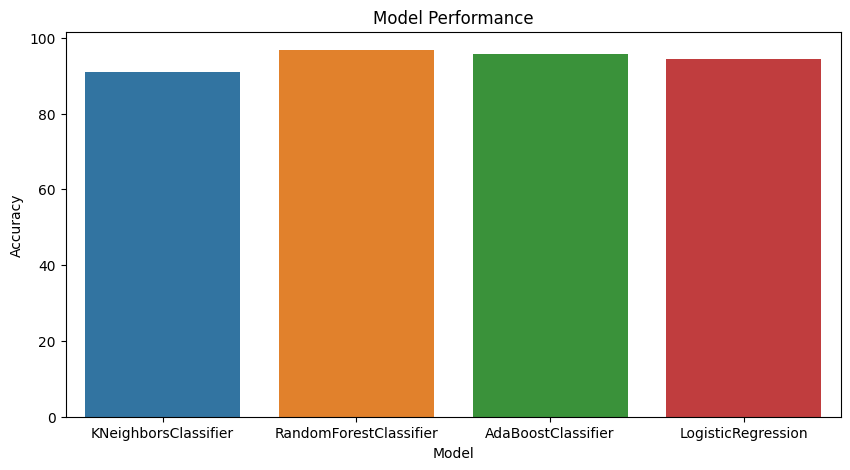

In [54]:
df_1=pd.DataFrame({'Model':model_name,'Accuracy':accuracy})
plt.figure(figsize=(10,5))
plt.title("Model Performance")
sns.barplot(x='Model',y='Accuracy',data=df_1,hue='Model',)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

**INFERENCE**

RandomForestClassifier have better accuracy than other models so we are tuning RandomForestClassifier

**HYPERPARAMETER TUNING**

In [57]:
params={'n_estimators':[20,50,100],'criterion':['gini','entropy'],'random_state':[0,1,18,42]}
rdfc=GridSearchCV(rf,params,cv=10,scoring='accuracy')  
rdfc.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=25, random_state=18),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [20, 50, 100],
                         'random_state': [0, 1, 18, 42]},
             scoring='accuracy')

**Best Parameters**

In [58]:
rdfc.best_params_

{'criterion': 'gini', 'n_estimators': 100, 'random_state': 18}

In [59]:
y_pred_rdfc=rdfc.predict(X_test)

**Performance Measures**

Accuracy Score :  0.9715762273901809
Precision Score:  0.9877300613496932
Recall Score   :  0.7931034482758621


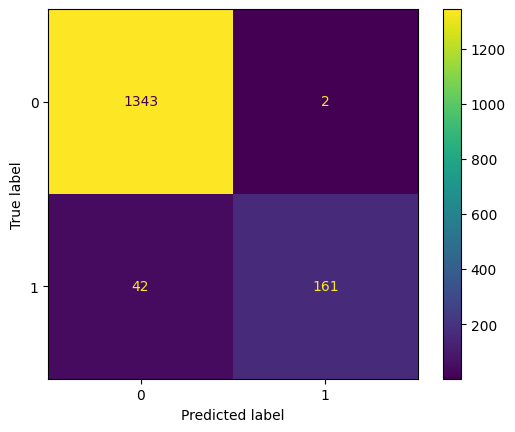

In [60]:
print("Accuracy Score : ",accuracy_score(y_test,y_pred_rdfc))
print("Precision Score: ",precision_score(y_test,y_pred_rdfc))
print("Recall Score   : ",recall_score(y_test,y_pred_rdfc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rdfc))

# **New Prediction**

In [63]:
#Predicting New Value
y_pred_new=rdfc.predict(vectorizer.transform(["Did you catch the bus ? Are you frying an egg ? Did you make a tea? Are you eating your mom's left over dinner ? Do you feel my Love ?"]))
if y_pred_new.item() == 0:
  print("Ham")
else:
  print("Spam")

Ham


# **WordCloud**

**WordCloud for Ham Messages**

In [39]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

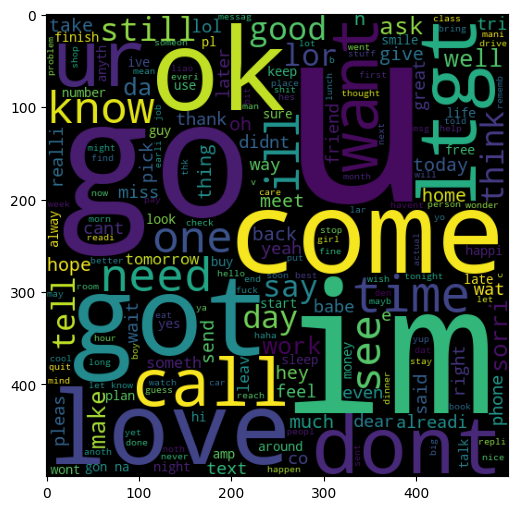

In [40]:
Ham_wc=wc.generate_from_text(df.loc[df['target']==0]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(Ham_wc)
plt.show()

**WordCloud for Spam Messages**

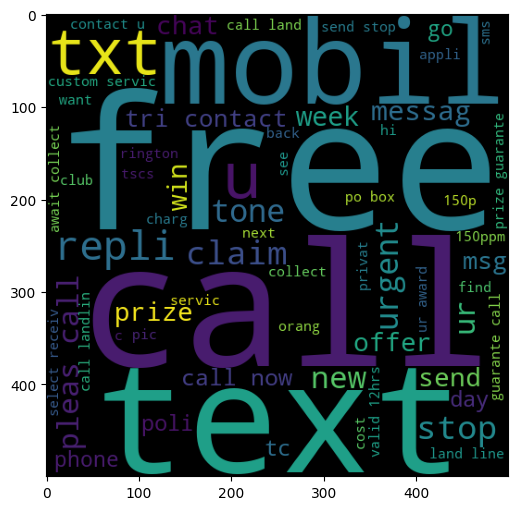

In [41]:
spam_wc=wc.generate_from_text(df.loc[df['target']==1]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()